=== ETAPA 1: CARREGANDO MNIST ===
Dispositivo: cpu
Carregando MNIST...
Tamanho do dataset de treino: 60000 imagens
Tamanho do dataset de teste: 10000 imagens

Formato da imagem: torch.Size([1, 1, 28, 28])
Label: 3


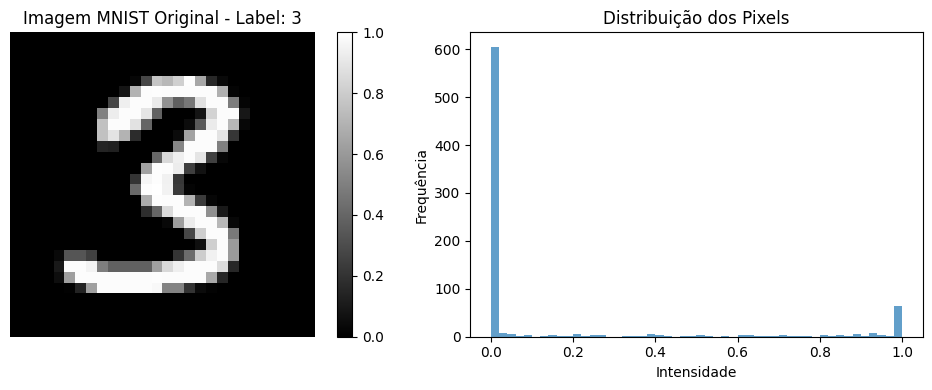

Valores dos pixels - Min: 0.000, Max: 1.000
Valores dos pixels - Média: 0.153, Std: 0.326


In [1]:
# =============================================
# ETAPA 1: CARREGAR E VISUALIZAR MNIST
# =============================================

import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

print("=== ETAPA 1: CARREGANDO MNIST ===")

# 1.1 Configurações básicas
batch_size = 1  # Vamos ver UMA imagem por vez
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo: {device}")

# 1.2 Transformações (pré-processamento básico)
transform = transforms.Compose([
    transforms.ToTensor(),           # Converte para tensor (0-1)
    transforms.Normalize((0,), (1,)) # Normaliza
])

# 1.3 Carregar dataset MNIST
print("Carregando MNIST...")
mnist_train = datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('./data', train=False, download=True, transform=transform)

# 1.4 DataLoader simples
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

print(f"Tamanho do dataset de treino: {len(mnist_train)} imagens")
print(f"Tamanho do dataset de teste: {len(mnist_test)} imagens")

# 1.5 Pegar uma amostra
data_iter = iter(train_loader)
images, labels = next(data_iter)

print(f"\nFormato da imagem: {images.shape}")  # [batch, canais, altura, largura]
print(f"Label: {labels.item()}")

# 1.6 Visualizar a imagem ANTES de qualquer processamento
image_np = images[0][0].numpy()  # Pega primeiro batch, primeiro canal

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title(f'Imagem MNIST Original - Label: {labels.item()}')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(image_np.flatten(), bins=50, alpha=0.7)
plt.title('Distribuição dos Pixels')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

print(f"Valores dos pixels - Min: {image_np.min():.3f}, Max: {image_np.max():.3f}")
print(f"Valores dos pixels - Média: {image_np.mean():.3f}, Std: {image_np.std():.3f}")


=== ETAPA 2: APLICANDO CODIFICAÇÃO BSA COM GIF ===
Imagem flatten: torch.Size([1, 784])
Dados codificados em spikes: torch.Size([20, 1, 784])
Criando animação dos spikes...
Salvando GIF...
Mostrando animação...
=== ANIMAÇÃO DOS SPIKE GERADA! ===
O GIF foi salvo como 'spikes_evolution.gif'
Abaixo a animação dos spikes evoluindo no tempo:


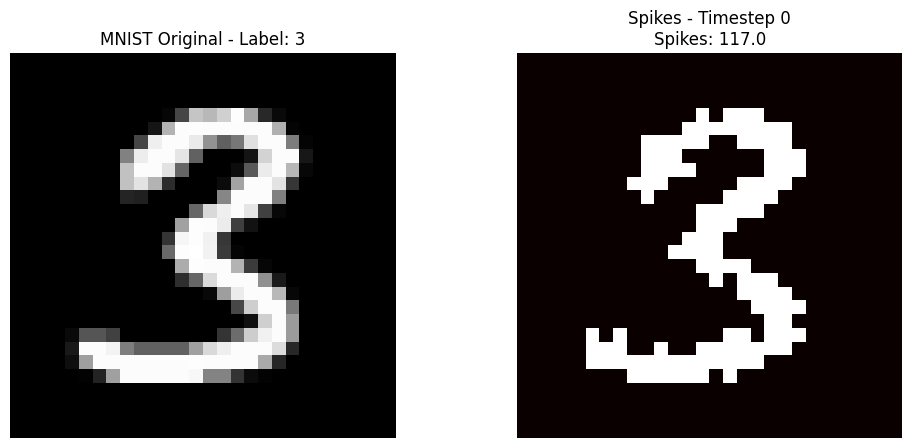

In [2]:
# =============================================
# ETAPA 2: CODIFICAÇÃO BSA COM GIF DOS SPIKE
# =============================================

import snntorch as snn
from snntorch import spikegen
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import torch

print("\n=== ETAPA 2: APLICANDO CODIFICAÇÃO BSA COM GIF ===")

# 2.1 Preparar a imagem para codificação
image_flat = images.view(1, -1)  # [1, 784]
print(f"Imagem flatten: {image_flat.shape}")

# 2.2 Codificação BSA (Rate Coding)
num_steps = 20  # Número de passos de tempo
spike_data = spikegen.rate(image_flat, num_steps=num_steps)

print(f"Dados codificados em spikes: {spike_data.shape}")

# 2.3 Criar GIF dos spikes ao longo do tempo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Configurar os plots
im1 = ax1.imshow(images[0][0].numpy(), cmap='gray')
ax1.set_title('Imagem MNIST Original')
ax1.axis('off')

im2 = ax2.imshow(spike_data[0, 0].view(28, 28).numpy(), cmap='hot', vmin=0, vmax=1)
ax2.set_title('Spikes - Timestep 0')
ax2.axis('off')

plt.tight_layout()

# Função de animação
def animate(frame):
    # Atualizar o mapa de spikes para o timestep atual
    spike_map = spike_data[frame, 0].view(28, 28).numpy()
    im2.set_array(spike_map)
    ax2.set_title(f'Spikes - Timestep {frame}')
    
    # Também mostrar estatísticas no título
    spikes_in_frame = torch.sum(spike_data[frame]).item()
    ax2.set_title(f'Spikes - Timestep {frame}\nTotal spikes: {spikes_in_frame}')
    
    return [im2]

# Criar a animação
print("Criando animação dos spikes...")
anim = animation.FuncAnimation(fig, animate, frames=num_steps, interval=500, blit=False)

# Salvar como GIF
print("Salvando GIF...")
anim.save('spikes_evolution.gif', writer='pillow', fps=2)

# Mostrar no notebook
plt.close()  # Fechar a figura estática
print("Mostrando animação...")

# Criar nova figura para a animação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.close()  # Vamos usar o HTML para mostrar

# Re-criar a animação para display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im1 = ax1.imshow(images[0][0].numpy(), cmap='gray')
ax1.set_title(f'MNIST Original - Label: {labels.item()}')
ax1.axis('off')

im2 = ax2.imshow(spike_data[0, 0].view(28, 28).numpy(), cmap='hot', vmin=0, vmax=1)
ax2.set_title('Spikes - Timestep 0')
ax2.axis('off')

def animate_full(frame):
    spike_map = spike_data[frame, 0].view(28, 28).numpy()
    im2.set_array(spike_map)
    spikes_count = torch.sum(spike_data[frame]).item()
    ax2.set_title(f'Spikes - Timestep {frame}\nSpikes: {spikes_count}')
    return [im2]

anim_display = animation.FuncAnimation(fig, animate_full, frames=num_steps, interval=400, blit=False)

# Mostrar como HTML
print("=== ANIMAÇÃO DOS SPIKE GERADA! ===")
print("O GIF foi salvo como 'spikes_evolution.gif'")
print("Abaixo a animação dos spikes evoluindo no tempo:")

HTML(anim_display.to_jshtml())


=== ETAPA 3: CONSTRUINDO E TREINANDO A REDE SNN ===
Configurando parâmetros da rede...
Arquitetura: 784 -> 256 -> 10
Timesteps: 10, Beta: 0.9
Modelo criado! Total de parâmetros: 203,530
Loss function: Cross-Entropy Rate Loss
Otimizador: Adam

Preparando DataLoaders...

INICIANDO TREINAMENTO DA SNN!

--- Época 1/3 ---
  Batch 0/234, Loss: 2.3048, Acc: 7.81%
  Batch 50/234, Loss: 1.7070, Acc: 81.25%
  Batch 100/234, Loss: 1.6132, Acc: 87.11%
  Batch 150/234, Loss: 1.5672, Acc: 90.62%
  Batch 200/234, Loss: 1.5506, Acc: 93.75%

RESUMO Época 1:
  Loss de Treino: 1.6589
  Acurácia de Treino: 84.06%
  Acurácia de Teste: 92.84%

--- Época 2/3 ---
  Batch 0/234, Loss: 1.5638, Acc: 92.97%
  Batch 50/234, Loss: 1.5126, Acc: 96.09%
  Batch 100/234, Loss: 1.5600, Acc: 91.41%
  Batch 150/234, Loss: 1.5204, Acc: 94.92%
  Batch 200/234, Loss: 1.5149, Acc: 96.09%

RESUMO Época 2:
  Loss de Treino: 1.5351
  Acurácia de Treino: 93.75%
  Acurácia de Teste: 94.69%

--- Época 3/3 ---
  Batch 0/234, Loss: 

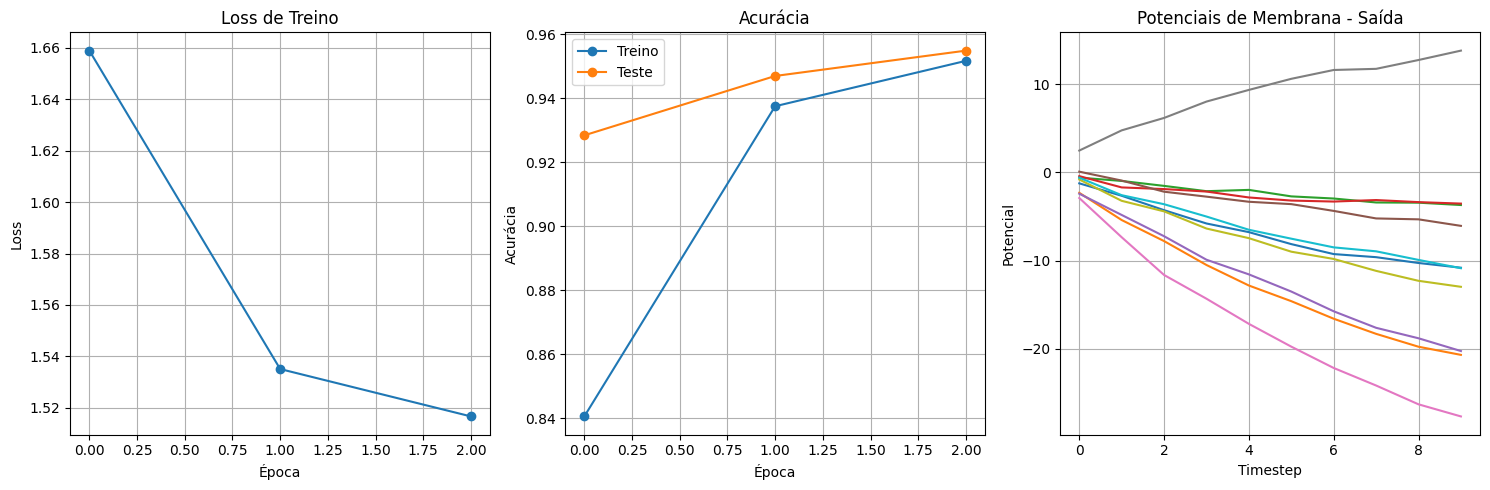


🏆 ACURÁCIA FINAL NO TESTE: 95.42%

Visualizando atividade dos spikes na rede...


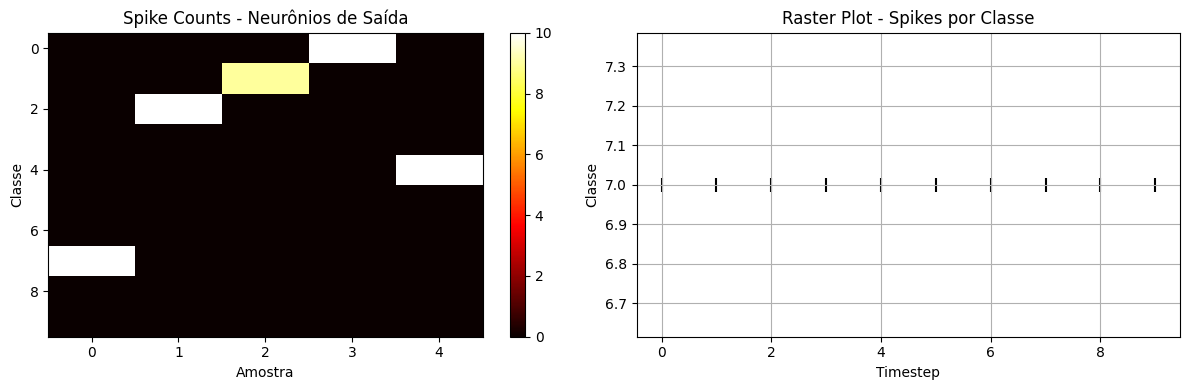


✅ TREINAMENTO CONCLUÍDO!
A rede SNN agora está treinada e alcançou 95.42% de acurácia no MNIST!


In [3]:
# =============================================
# ETAPA 3: REDE SNN COMPLETA + TREINAMENTO
# =============================================

import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate
from snntorch import functional as SF
from snntorch import utils
import torch.optim as optim

print("\n=== ETAPA 3: CONSTRUINDO E TREINANDO A REDE SNN ===")

# 3.1 Parâmetros da Rede
num_inputs = 784
num_hidden = 256#1000
num_outputs = 10
num_steps = 10#50
batch_size = 256#128
beta = 0.9#0.99  # decay rate
spike_grad = surrogate.fast_sigmoid(slope=25)

print("Configurando parâmetros da rede...")
print(f"Arquitetura: {num_inputs} -> {num_hidden} -> {num_outputs}")
print(f"Timesteps: {num_steps}, Beta: {beta}")

# 3.2 Definir a Rede SNN
class SNN_Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Camadas lineares (PyTorch)
        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.fc2 = nn.Linear(num_hidden, num_outputs)
        
        # Neurônios LIF (snnTorch)
        self.lif1 = snn.Leaky(beta=beta, spike_grad=spike_grad)
        self.lif2 = snn.Leaky(beta=beta, spike_grad=spike_grad)
        
    def forward(self, x):
        # Inicializar estados da memória
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        
        # Listas para registrar saídas
        spk2_rec = []
        mem2_rec = []
        
        # Loop temporal - BPTT através do tempo
        for step in range(num_steps):
            # Camada 1: Input -> Hidden
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            
            # Camada 2: Hidden -> Output  
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            
            # Registrar saídas da camada final
            spk2_rec.append(spk2)
            mem2_rec.append(mem2)
        
        return torch.stack(spk2_rec), torch.stack(mem2_rec)

# Instanciar modelo
model = SNN_Model().to(device)
print(f"Modelo criado! Total de parâmetros: {sum(p.numel() for p in model.parameters()):,}")

# 3.3 Funções de Loss e Otimização
loss_fn = SF.ce_rate_loss()  # Cross-entropy baseado na taxa de spikes
optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999))

print("Loss function: Cross-Entropy Rate Loss")
print("Otimizador: Adam")

# 3.4 Função de Acurácia
def calculate_accuracy(spk_rec, targets):
    """Calcula acurácia baseada na contagem de spikes"""
    return SF.accuracy_rate(spk_rec, targets)

# 3.5 Função de Forward Pass Completo
def full_forward_pass(net, data, targets=None, num_steps=num_steps):
    """Executa forward pass completo com codificação BSA"""
    # Pré-processamento: Flatten
    data_flat = data.view(data.size(0), -1)
    
    # Codificação BSA: converter para spikes
    spike_data = spikegen.rate(data_flat, num_steps=num_steps)
    
    # Forward pass pela rede
    spk_rec, mem_rec = net(spike_data)
    
    return spk_rec, mem_rec

# 3.6 Loop de Treinamento
def train_epoch(model, dataloader, optimizer):
    model.train()
    total_loss = 0
    total_acc = 0
    num_batches = len(dataloader)
    
    for batch_idx, (data, targets) in enumerate(dataloader):
        data, targets = data.to(device), targets.to(device)
        
        # Forward pass
        spk_rec, _ = full_forward_pass(model, data, targets)
        
        # Calcular loss e acurácia
        loss_val = loss_fn(spk_rec, targets)
        acc_val = calculate_accuracy(spk_rec, targets)
        
        # Backward pass (BPTT automático!)
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()
        
        total_loss += loss_val.item()
        total_acc += acc_val
        
        if batch_idx % 50 == 0:
            print(f"  Batch {batch_idx}/{num_batches}, Loss: {loss_val.item():.4f}, Acc: {acc_val*100:.2f}%")
        
    return total_loss / num_batches, total_acc / num_batches

# 3.7 Loop de Validação
def validate_epoch(model, dataloader):
    model.eval()
    total_acc = 0
    num_batches = len(dataloader)
    
    with torch.no_grad():
        for data, targets in dataloader:
            data, targets = data.to(device), targets.to(device)
            
            # Forward pass
            spk_rec, _ = full_forward_pass(model, data, targets)
            
            # Calcular acurácia
            acc_val = calculate_accuracy(spk_rec, targets)
            total_acc += acc_val
            
    return total_acc / num_batches

# 3.8 DataLoaders para treinamento
print("\nPreparando DataLoaders...")
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

# 3.9 TREINAMENTO!
print("\n" + "="*50)
print("INICIANDO TREINAMENTO DA SNN!")
print("="*50)

num_epochs = 3  # Começar com poucas épocas

train_losses = []
train_accuracies = [] 
test_accuracies = []

for epoch in range(num_epochs):
    print(f"\n--- Época {epoch+1}/{num_epochs} ---")
    
    # Treinamento
    train_loss, train_acc = train_epoch(model, train_loader, optimizer)
    
    # Validação
    test_acc = validate_epoch(model, test_loader)
    
    # Registrar métricas
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"\nRESUMO Época {epoch+1}:")
    print(f"  Loss de Treino: {train_loss:.4f}")
    print(f"  Acurácia de Treino: {train_acc*100:.2f}%")
    print(f"  Acurácia de Teste: {test_acc*100:.2f}%")

# 3.10 Visualização dos Resultados
print("\n" + "="*50)
print("VISUALIZANDO RESULTADOS")
print("="*50)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(train_losses, 'o-')
plt.title('Loss de Treino')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.grid(True)

# Plot Acurácia
plt.subplot(1, 3, 2)
plt.plot(train_accuracies, 'o-', label='Treino')
plt.plot(test_accuracies, 'o-', label='Teste')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Plot exemplo de spikes de saída
plt.subplot(1, 3, 3)
# Pegar um batch de teste
test_data, test_targets = next(iter(test_loader))
test_data = test_data[:1].to(device)  # Apenas primeira amostra

with torch.no_grad():
    spk_rec, mem_rec = full_forward_pass(model, test_data)
    
# Plotar potenciais de membrana dos neurônios de saída
for i in range(num_outputs):
    plt.plot(mem_rec[:, 0, i].cpu().numpy(), label=f'Neurônio {i}')

plt.title('Potenciais de Membrana - Saída')
plt.xlabel('Timestep')
plt.ylabel('Potencial')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3.11 Teste Final
final_test_acc = validate_epoch(model, test_loader)
print(f"\n{'='*60}")
print(f"🏆 ACURÁCIA FINAL NO TESTE: {final_test_acc*100:.2f}%")
print(f"{'='*60}")

# 3.12 Visualizar Spikes da Rede
print("\nVisualizando atividade dos spikes na rede...")

# Pegar uma amostra
sample_data, sample_label = next(iter(test_loader))
sample_data = sample_data[:5].to(device)  # 5 amostras

with torch.no_grad():
    spk_rec, mem_rec = full_forward_pass(model, sample_data)

# Contar spikes por neurônio de saída
spike_counts = torch.sum(spk_rec, dim=0)  # Soma ao longo do tempo

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(spike_counts.cpu().T, aspect='auto', cmap='hot')
plt.colorbar()
plt.title('Spike Counts - Neurônios de Saída')
plt.xlabel('Amostra')
plt.ylabel('Classe')

plt.subplot(1, 2, 2)
# Spike raster plot para primeira amostra
for i in range(num_outputs):
    spikes = spk_rec[:, 0, i].cpu().numpy()
    spike_times = np.where(spikes == 1)[0]
    plt.scatter(spike_times, np.ones_like(spike_times) * i, color='black', marker='|', s=100)

plt.title('Raster Plot - Spikes por Classe')
plt.xlabel('Timestep')
plt.ylabel('Classe')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n✅ TREINAMENTO CONCLUÍDO!")
print(f"A rede SNN agora está treinada e alcançou {final_test_acc*100:.2f}% de acurácia no MNIST!")